<h1>CREDIT RISK ANALYSIS</h1>
-Demographic Data - about the person
- Transactional Data - about their money

Boosting models
- joblib - save model and load it back to the machine

In [30]:
!pip install plotly
# import seaborn as sns

     --------------------------------------- 15.3/15.3 MB 11.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex


In [3]:
credit_analysis=pd.read_csv('credit_risk_dataset.csv')

In [4]:
credit_analysis.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
credit_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [42]:
credit_analysis["loan_status"].unique()

array([1, 0], dtype=int64)

In [15]:
# describe for numerical values
# For numerical Values
# T is for Transposing
# Used to get statistics
credit_analysis.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [14]:
# Categorical Values/Object Values
credit_analysis.describe(include="O").T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [22]:

# Find missing values
credit_analysis.isnull().sum().sort_values(ascending=True)

person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
person_emp_length              895
loan_int_rate                 3116
dtype: int64

<h1></h1>

In [23]:
# Find missing values
# Generate Percentages
(credit_analysis.isnull().sum()*100/len(credit_analysis)).round(2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

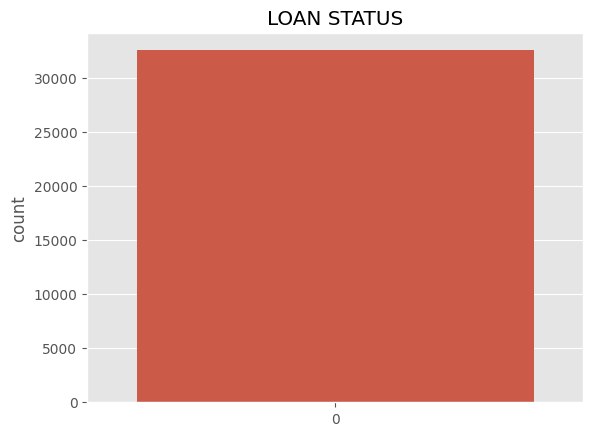

In [27]:
#UNIVARIATE ANALYSIS - using one column
# BIVARIATE
plt.style.use("ggplot")
sns.countplot(credit_analysis["loan_status"])
plt.title("LOAN STATUS")
plt.show()

In [28]:
fig.axes = plt.subplots(2,2, figsize(2,10))



NameError: name 'figsize' is not defined

In [29]:
ex.pie(credit_analysis,names='loan_intent',title='Proportion for loan intent', hole=0.33)

NameError: name 'ex' is not defined

TypeError: title() missing 1 required positional argument: 'label'

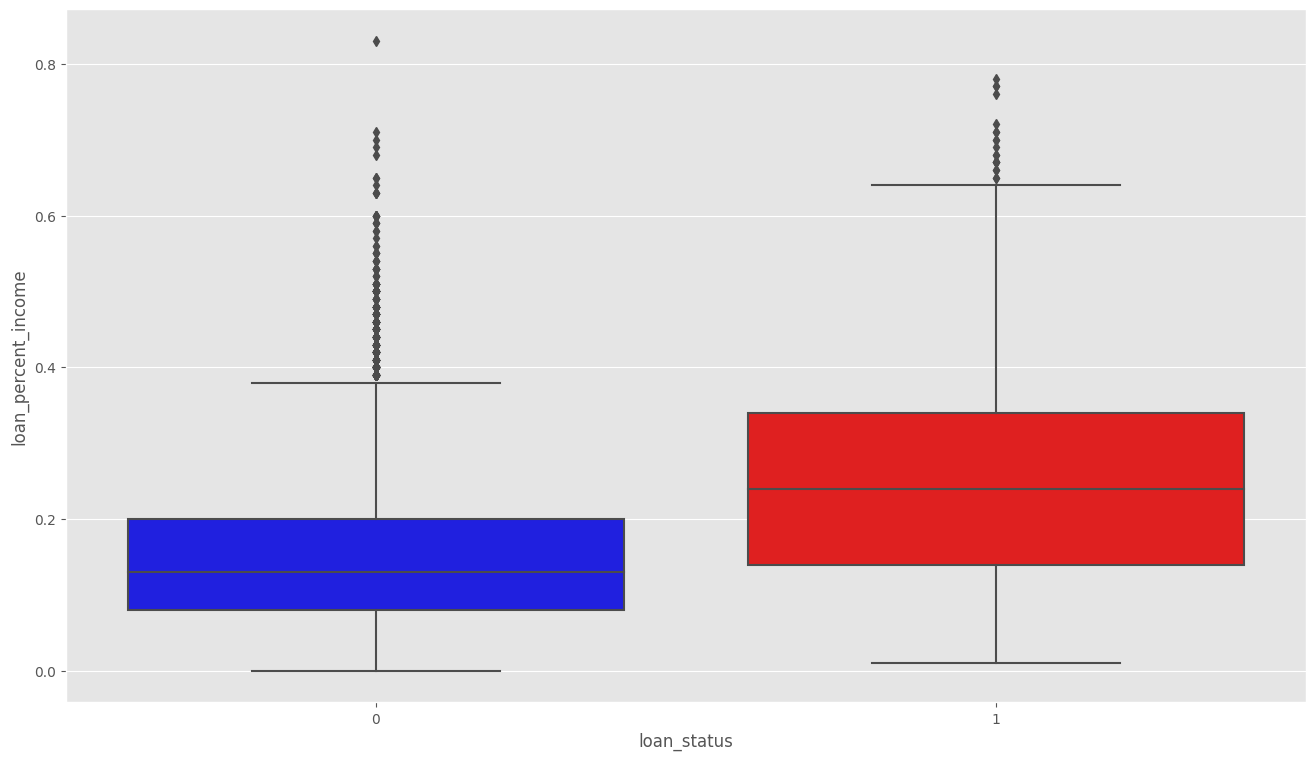

In [33]:
#BIVARIATE ANALYSIS
# BOX PLOT - used for numerical values and 
# Check for Outliers
data = credit_analysis[["loan_status","loan_percent_income"]]
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x="loan_status", y="loan_percent_income", data = data, palette=['blue','red']);
# Blue - non-defaulters  Red - Defaulters
#From the Plot: Give people money that they can be able to repay

plt.title()
plt.xticks()
plt.yticks()
plt.xlabel()
plt.ylabel()
plt.show()

In [38]:
my_colours = ["red", "blue"]
sns.countplot('cb_person_default_on_file', hue='loan_st')

ValueError: Cannot use `hue` without `x` and `y`

In [ ]:
#Heat Map - distribution of values
'''
1. Pierson Correlation
2. Spearman correlation
'''

In [35]:
credit_analysis.corr(method="pearson").style.background_gradient(cmap="rocket_r")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9112\324944114.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_analysis.corr(method="pearson").style.background_gradient(cmap="rocket_r")


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


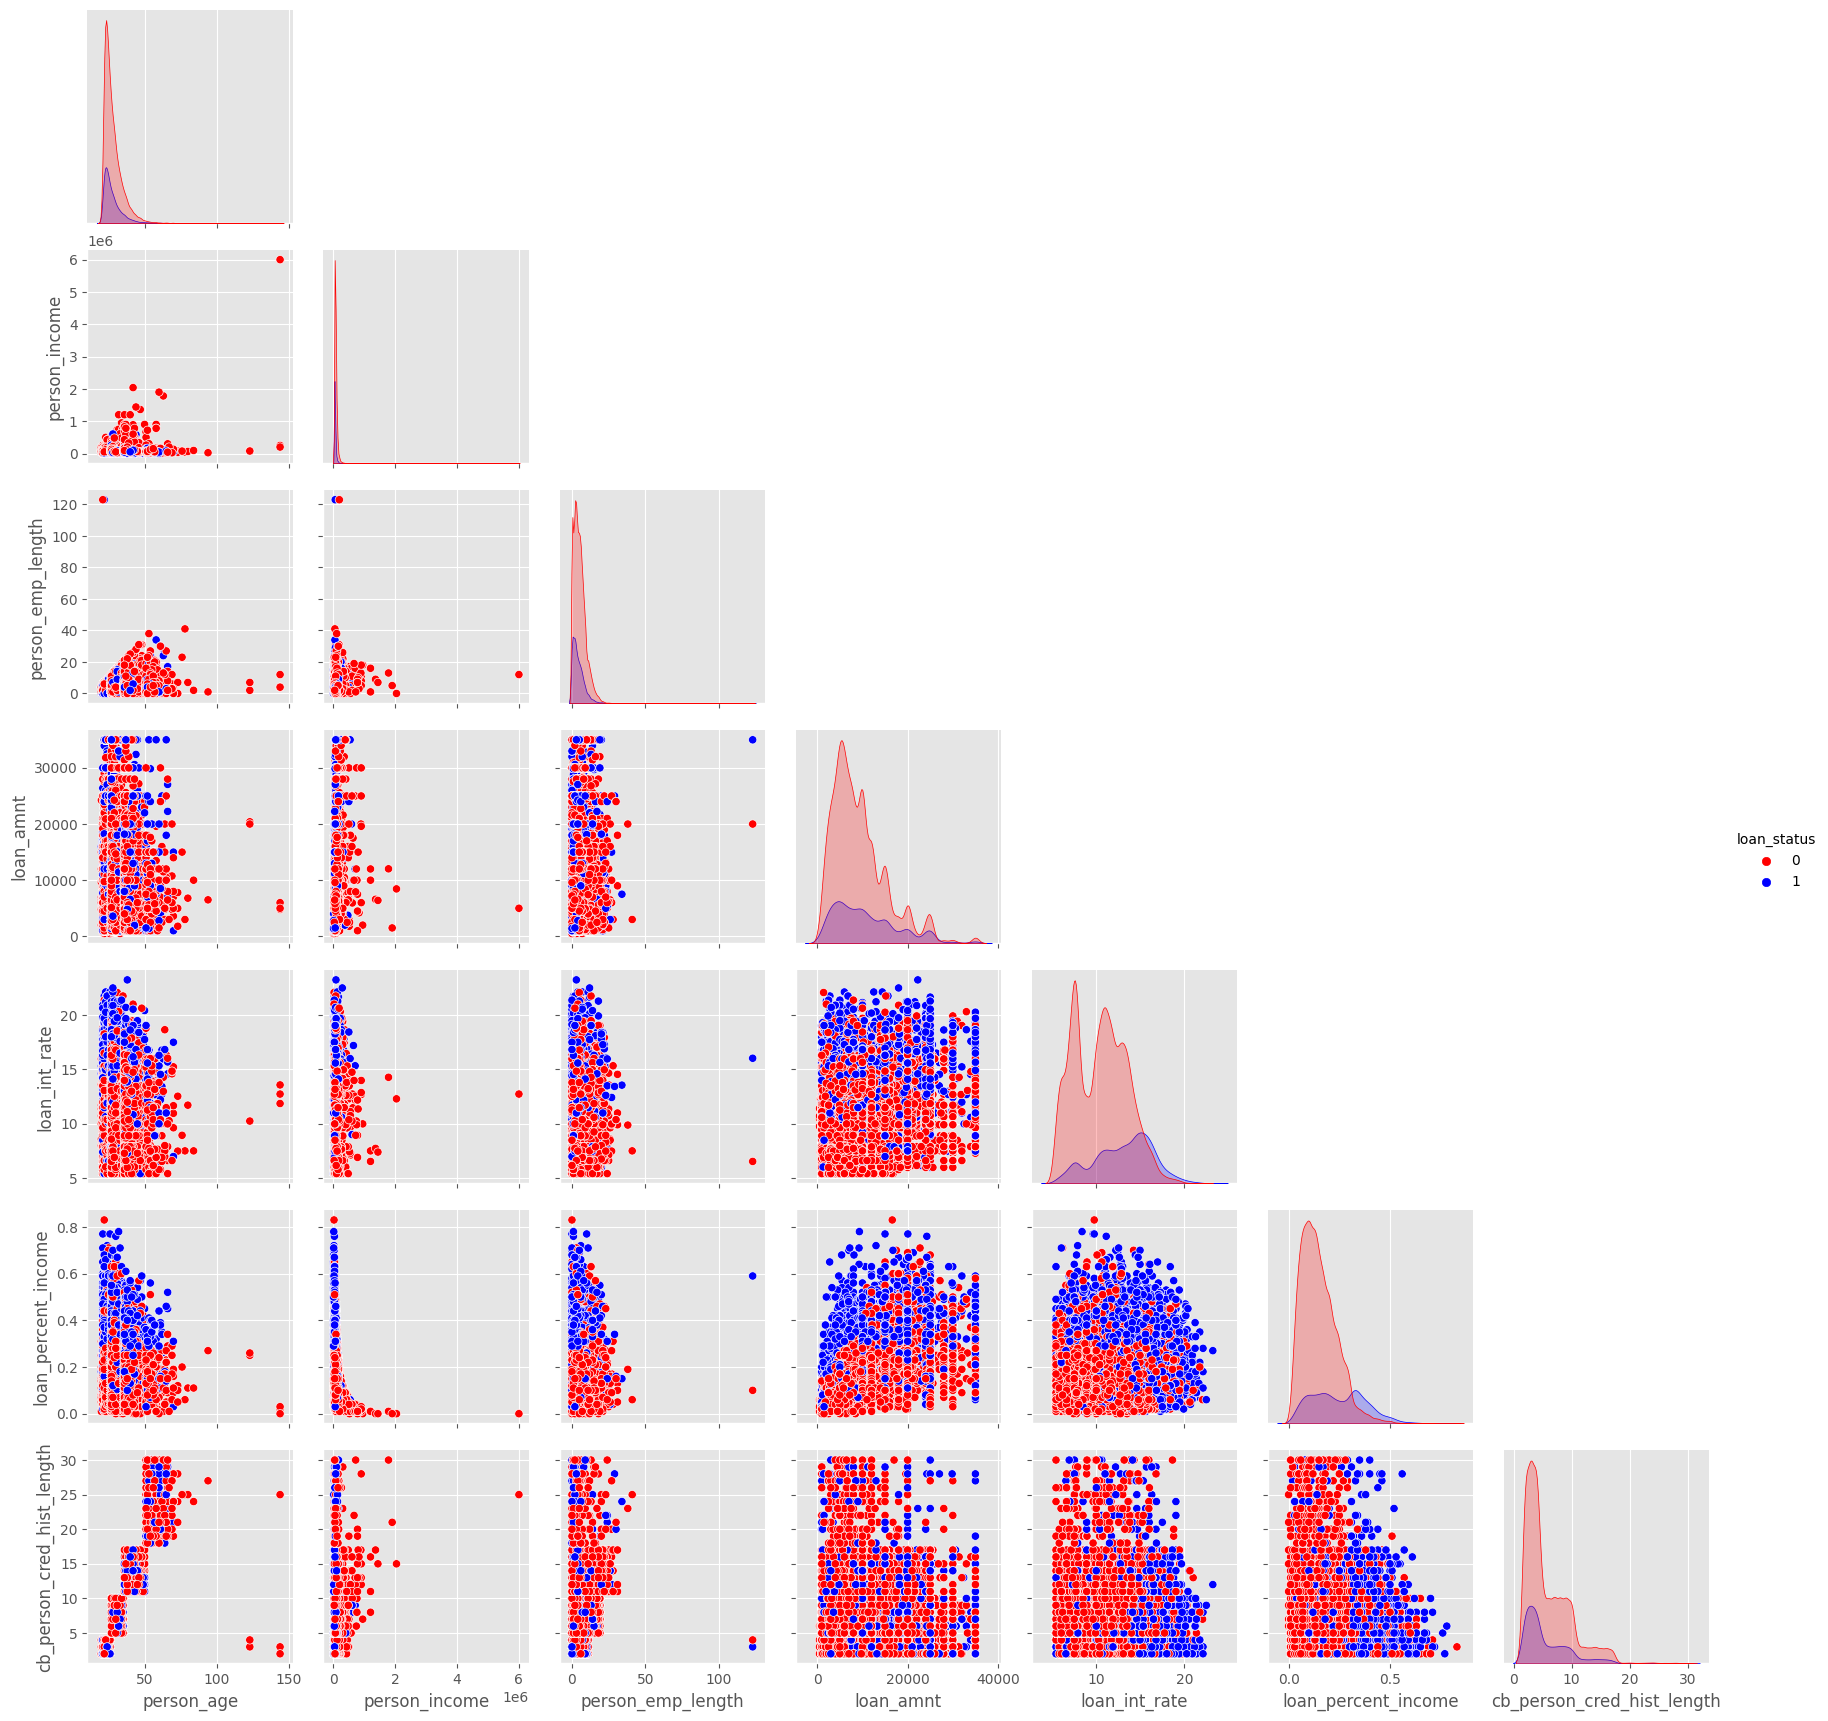

In [39]:
#Scatter Plot - compare two numerical values
my_colours=["red","blue"]
sns.pairplot(credit_analysis, hue="loan_status",palette=my_colours,corner=True)

In [40]:
credit_analysis.skew()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9112\4187864887.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_analysis.skew()


person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [41]:
credit_analysis.kurtosis()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9112\2239248744.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_analysis.kurtosis()


person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

<h1>CROSS TABULATION</h1>
1. Median - not normally distributed
2. Mean - normally distributed

- Dummy Encoding
- Label Encoding
- Concat(columns) append(rows)


X - independent variables(features)
Y - dependent variables we are trying to predict


Logisitic regression - discrete values 0 and 1  like gender male/female
Linear regression - continuous values like salary; gradient, y = m(gradient)x+c(constant)+a(error)

BaseLine model - model made using the full dataset

1. Markov's
2. Genie Coefficient
3. Root mean scquare
4. P value and T value

<h2>Metrics</h2>
- Recall - can it identify false positives
- Precisions - can it identrify true positives like the actual people who defaulted
- F1 Score - the accuracy of the model
- Accuracy - not a good metric. If we have 10 people. We have 8 good customers and we find the good ones with the accuracy is 80% which is not a good measure as we didn't find the bad customers

Random forest - it merges many decision trees to make a better prediction

<u><b>READ ABOUT XGBOOST and CATBOOST and LOSSRATE</b></u>

<b>Misclasification Analysis</b>- who could have been misclassified</br>
<b>Hyper Parameter Tuning</b>
Random Search
Grid Search
<b>Learning Curve???</b>
- Improve model by adding more features

** Confusion Matrix 